> # KNN算法

> ### KNN分类预测

In [1]:
import numpy as np
import pandas as pd

#### header 参数指定标题行，默认0 没有标题设置None

In [2]:
data = pd.read_csv(r'./files/iris.csv',header=0)
data.head()     # 首位5行默认为5"
data.tail()     # 末尾n行默认为5
data.sample()   # 随机抽取默认为1
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
data['species'] = data['species'].map({'setosa':0,'virginica':1,'versicolor':2})
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [4]:
data.duplicated().any()
data.drop_duplicates(inplace=True)
data['species'].value_counts()

species
2    50
1    49
0    48
Name: count, dtype: int64

In [5]:
class KNN_C:
    def __init__(self,k) -> None:
        # 初始化
        self.k = k
    
    def fit(self,X,y):
        '''
        训练方法
        
        ------
        X:  类数组类型,形状为:[样本数量,特征数量]
            带训练的样本特征
        
        y:  类数组类型,形状为:[样本数量]
            每个样本的目标值,标签
        '''
        # 将X转化成ndarray
        self.X = np.asarray(X) 
        self.y = np.asarray(y)
        
    def predict_basic(self,X):
        '''
        根据参数传递的样本 对数据进行预测
        
        Parameters
        ------
        X:  类数组类型,形状为:[样本数量,特征数量]
            带训练的样本特征
        
        Returns
        ------
        result: 数组类型
                预测的结果
        '''
        X = np.asarray(X)
        result = []
        
        # 行遍历
        for x in X:
            # 标准差
                # s = x - self.X    
            # 欧氏距离
            distance= np.sqrt(np.sum((x-self.X)**2,axis=1))
            # 返回排序后原数组索引
            index = distance.argsort()
            # 取前K个 因此进行截断
            index =index[:self.k]
            # 选出对应位置的y 统计次数
            count = np.bincount(self.y[index])
            # 最多的次数
            result.append(count.argmax())
        return np.asarray(result)
    def predict(self,X):
        '''
        根据参数传递的样本 对数据进行预测
        
        Parameters
        ------
        X:  类数组类型,形状为:[样本数量,特征数量]
            带训练的样本特征
        
        Returns
        ------
        result: 数组类型
                预测的结果
        '''
        X = np.asarray(X)
        result = []
        
        # 行遍历
        for x in X:
            # 标准差
                # s = x - self.X    
            # 欧氏距离
            distance= np.sqrt(np.sum((x-self.X)**2,axis=1))
            # 返回排序后原数组索引
            index = distance.argsort()
            # 取前K个 因此进行截断
            index =index[:self.k]
            # 选出对应位置的y 根据权重 统计次数
            count = np.bincount(self.y[index],weights=1/distance[index])
            # 最多的次数
            result.append(count.argmax())
        return np.asarray(result)

In [6]:
# 分割训练集和测试集
# 提取每个类别的数据
t0 = data[data['species']==0]
t1 = data[data['species']==1]
t2 = data[data['species']==2]
t0 = t0.sample(len(t0),random_state=0)
t1 = t1.sample(len(t1),random_state=0)
t2 = t2.sample(len(t2),random_state=0)

# 构建训练集 测试集
train_X = pd.concat([t0.iloc[:40,:-1],t1.iloc[:40,:-1],t2.iloc[:40,:-1]],axis=0)
train_y = pd.concat([t0.iloc[:40,-1],t1.iloc[:40,-1],t2.iloc[:40,-1]],axis=0)

test_X = pd.concat([t0.iloc[40:,:-1],t1.iloc[40:,:-1],t2.iloc[40:,:-1]],axis=0)
test_y = pd.concat([t0.iloc[40:,-1],t1.iloc[40:,-1],t2.iloc[40:,-1]],axis=0)

knn = KNN_C(k = 3)
# 训练
knn.fit(train_X,train_y)
# 测试
result = knn.predict(test_X)

# display(result)
# display(test_y)
display(np.sum(result==test_y)) 
display("Percent:", np.sum(result==test_y)/len(result))

26

'Percent:'

0.9629629629629629

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [8]:
# 可用的字体类型
for font in fm.fontManager.ttflist:
    # print(font.name,end=' ')
    pass

In [9]:
# 默认英文
# 设置黑体
mpl.rcParams['font.family'] = "Heiti TC"
# 设置负号(-)
mpl.rcParams['axes.unicode_minus'] = False

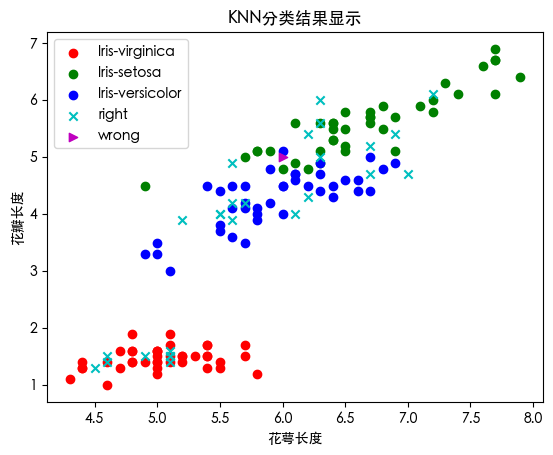

In [10]:
# 训练集
plt.scatter(x=t0['sepal_length'][:40],y=t0['petal_length'][:40],color='r',label='Iris-virginica')
plt.scatter(x=t1['sepal_length'][:40],y=t1['petal_length'][:40],color='g',label='Iris-setosa')
plt.scatter(x=t2['sepal_length'][:40],y=t2['petal_length'][:40],color='b',label='Iris-versicolor')
# 测试集
right = test_X[result==test_y]
wrong = test_X[result!=test_y]
plt.scatter(x=right['sepal_length'],y=right['petal_length'],color='c',marker='x',label='right')
plt.scatter(x=wrong['sepal_length'],y=wrong['petal_length'],color='m',marker='>',label='wrong')
plt.xlabel("花萼长度")
plt.ylabel("花瓣长度")
plt.title("KNN分类结果显示")
plt.legend(loc='best')

> ### KNN回归预测

In [11]:
import numpy as np
import pandas as pd

In [12]:
data = pd.read_csv('./files/iris.csv')
data.drop(['species'],axis=1,inplace=True)
data.drop_duplicates(inplace=True)
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
class KNN_R:
    def __init__(self,k) -> None:
        # 初始化
        self.k = k
    
    def fit(self,X,y):
        '''
        训练方法
        
        ------
        X:  类数组类型,形状为:[样本数量,特征数量]
            带训练的样本特征
        
        y:  类数组类型,形状为:[样本数量]
            每个样本的目标值,标签
        '''
        # 将X转化成nparray
        self.X = np.asarray(X)
        self.y = np.asarray(y)
        
    def predict_basic(self,X):
        '''
        根据参数传递的样本 对数据进行预测
        
        Parameters
        ------
        X:  类数组类型,形状为:[样本数量,特征数量]
            带训练的样本特征
        
        Returns
        ------
        result: 数组类型
                预测的结果
        '''
        X = np.asarray(X)
        result = []
        
        for x in X:
            # 标准差
                # s = x - self.X    
            # 欧氏距离
            distance= np.sqrt(np.sum((x-self.X)**2,axis=1))
            # 返回排序后原数组索引
            index = distance.argsort()
            # 取前K个 因此进行截断
            index =index[:self.k]
            result.append(np.mean(self.y[index]))
        return result
    def predict(self,X):
        '''
        根据参数传递的样本 对数据进行预测
        
        Parameters
        ------
        X:  类数组类型,形状为:[样本数量,特征数量]
            带训练的样本特征
        
        Returns
        ------
        result: 数组类型
                预测的结果
        '''
        X = np.asarray(X)
        result = []
        
        for x in X:
            # 标准差
                # s = x - self.X    
            # 欧氏距离
            distance= np.sqrt(np.sum((x-self.X)**2,axis=1))
            # 返回排序后原数组索引
            index = distance.argsort()
            # 取前K个 进行截断 根据权重
            index =index[:self.k]
            s = np.sum(1/(distance[index]+0.000000000000000000000001))
            weigths = (1/(distance[index]+0.000000000000000000000001)) /s
            
            result.append(np.sum(weigths *self.y[index]))
        return result

In [14]:
t = data.sample(len(data),random_state=0)

train_X = t.iloc[:120,:-1]
train_y = t.iloc[:120,-1]

test_X = t.iloc[120:,:-1]
test_y = t.iloc[120:,-1]

knn = KNN_R(k=3)
knn.fit(train_X,train_y) 
result= knn.predict(test_X)
display(result)
# 误差的方差
np.mean(np.sum(result-test_y)**2)
display(test_y.values)

[1.3541198234291045,
 2.0402232927174335,
 1.155292304160408,
 1.2633077758149525,
 2.2,
 1.1633670813357746,
 2.1236921487241847,
 0.36951541759303386,
 1.8875,
 1.383592719605378,
 1.2079679356026762,
 0.1716699605900981,
 1.9768660060540153,
 2.23576080826668,
 1.6763297764921743,
 0.13818200321667007,
 1.0222015262012338,
 1.3,
 1.8555089482511353,
 1.2301527206179916,
 0.1729669293927397,
 0.24377407751375035,
 0.17101020514433646,
 2.0155337034831042,
 1.1878679656440359,
 1.8228307409608926,
 0.2]

array([1.5, 1.8, 1. , 1.3, 2.1, 1.2, 2.2, 0.2, 2.3, 1.3, 1. , 0.2, 1.6,
       2.1, 2.3, 0.3, 1. , 1.2, 1.5, 1.3, 0.2, 0.4, 0.1, 2.1, 1.1, 1.5,
       0.2])

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [16]:
# 可用的字体类型
for font in fm.fontManager.ttflist:
    # print(font.name,end=' ')
    pass

In [17]:
# 默认英文
# 设置黑体
mpl.rcParams['font.family'] = "Heiti TC"
# 设置负号(-)
mpl.rcParams['axes.unicode_minus'] = False

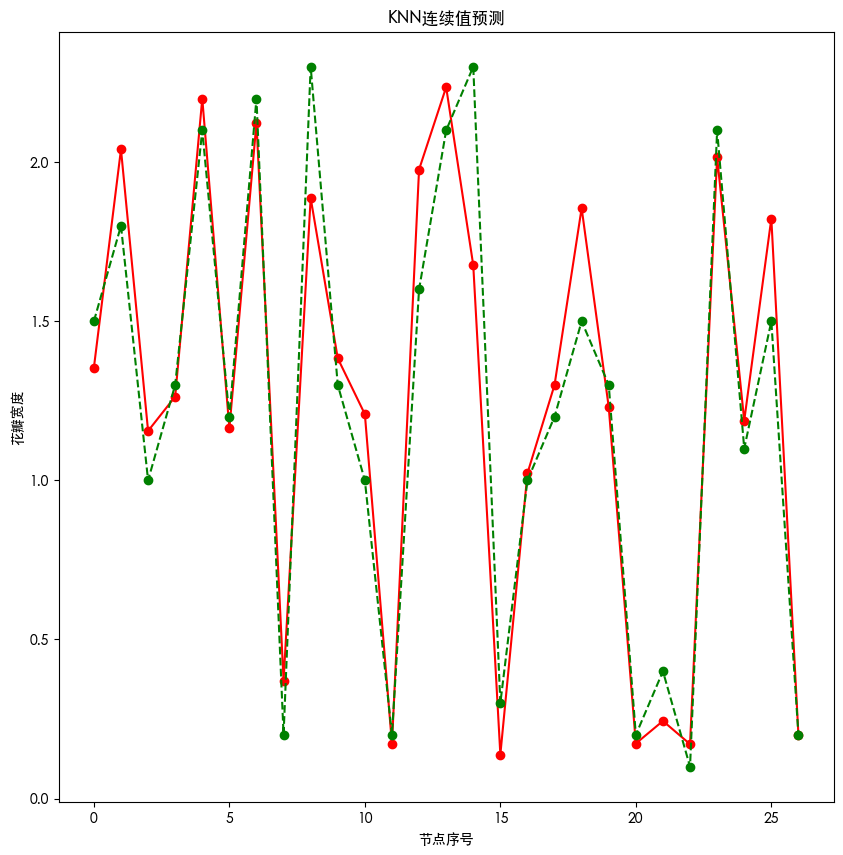

In [18]:
plt.figure(figsize=(10,10))
plt.plot(result,'ro-',label="预测值")
plt.plot(test_y.values,'go--',label="真实值")
plt.title("KNN连续值预测")
plt.xlabel("节点序号")
plt.ylabel("花瓣宽度")
plt.show()